<a href="https://colab.research.google.com/github/sreeja97/HR_Analytics_Prediction/blob/master/Analytics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
from scipy import stats
from scipy.stats import skew,norm

In [11]:
import seaborn as sns
color = sns.color_palette()


In [12]:
import os
print(os.listdir("."))

['.config', 'sample_data']


In [13]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [14]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
left = df[df.left==1]
left.shape

(3571, 10)

In [16]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

In [17]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


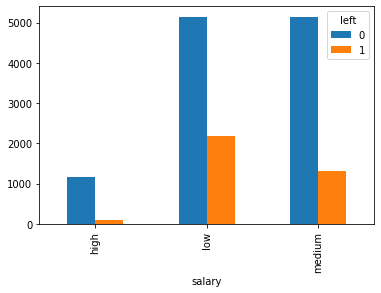

In [19]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

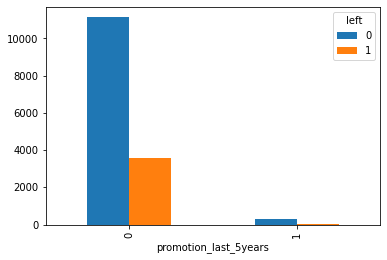

In [20]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

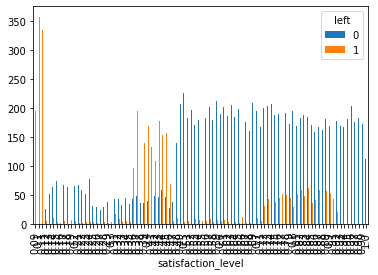

In [21]:
pd.crosstab(df.satisfaction_level,df.left).plot(kind='bar')

In [22]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [23]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [24]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [25]:
Y=df.left
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.7)

In [28]:
X_test.shape

(4500, 6)

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)

In [32]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
7840,0.71,262,0,0,0,1
10825,0.73,249,0,0,0,1
13865,0.87,184,0,0,1,0
3950,0.59,186,0,0,1,0
9729,0.47,140,0,0,0,1
...,...,...,...,...,...,...
4328,0.89,212,0,0,1,0
5961,0.66,135,0,0,0,1
12240,0.10,289,0,0,1,0
8597,0.71,190,0,0,1,0


In [34]:
y_predicted = model.predict(X_test)

In [35]:
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
model.predict_proba(X_test)

array([[0.85203411, 0.14796589],
       [0.8646473 , 0.1353527 ],
       [0.88628898, 0.11371102],
       ...,
       [0.26355   , 0.73645   ],
       [0.80996404, 0.19003596],
       [0.84436929, 0.15563071]])

In [37]:
model.score(X_test,y_test)

0.7755555555555556

In [41]:
from sklearn.metrics import accuracy_score
print("accuracy_score: %.2f"
      % accuracy_score(y_test, y_predicted))

accuracy_score: 0.78


In [46]:
import pickle
pickle.dump(model, open('/content/models/final_prediction.pickle', 'wb'))